In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def sum_column(table):
    result = [0] * len(table[0])
    for row in table:
        for col, value in enumerate(row):
            result[col] += value
    return result

def sum_k(data):
	res = []
	res.append(data[0][0])
	res.append(data[0][1])
	kvx = 0.
	kvy = 0.
	for column_i in range(len(data)):
		kvx = kvx + data[column_i][2]
		kvy = kvy + data[column_i][3]

	res.append(kvx)
	res.append(kvy)
	return res

def update_variables(body_list, k1_temp, k2_temp, k3_temp, k4_temp, h):
	res = []
	for i in range(len(k1_temp)):
		in_values = body_list[i].get_values()
		updated_x = in_values[0] + (h/6.)*(k1_temp[i][0] + 2*k2_temp[i][0]+2*k3_temp[i][0]+k4_temp[i][0])
		updated_y = in_values[1] + (h/6.)*(k1_temp[i][1] + 2*k2_temp[i][1]+2*k3_temp[i][1]+k4_temp[i][1])
		updated_vx = in_values[2] + (h/6.)*(k1_temp[i][2] + 2*k2_temp[i][2]+2*k3_temp[i][2]+k4_temp[i][2])
		updated_vy = in_values[3] + (h/6.)*(k1_temp[i][3] + 2*k2_temp[i][3]+2*k3_temp[i][3]+k4_temp[i][3])
		res.append([updated_x, updated_y, updated_vx, updated_vy])

	return res


class body_class():
	def __init__(self, pos_x, pos_y, vel_x, vel_y, body_mass, body_radius, body_name):
		self.pos_x = pos_x
		self.pos_y = pos_y
		self.vel_x = vel_x
		self.vel_y = vel_y
		self.body_radius = body_radius
		self.mass = body_mass
		self.name = body_name

	def update_values(self, pos_x, pos_y, vel_x, vel_y):
		self.pos_x = pos_x
		self.pos_y = pos_y
		self.vel_x = vel_x
		self.vel_y = vel_y

	def get_values(self):
		return [self.pos_x, self.pos_y, self.vel_x, self.vel_y, self.mass, self.body_radius, self.name]

In [9]:
t0 = 0.
tf = 5*365*3600*24
# tf = 20000
h = 3600
# h = 0.001
G_n = 6.67e-11 # Newton's constant
M_earth = 5.972e24 #Earth mass
M_sun = 2e30
M_jupiter =1.89e27
r_earth = float(149597870700.0)
r_jupiter = 5.2*r_earth
v_earth = 29.78 * 1000.0
v_jupiter = 13.06 * 1000.0
M_JWST = 6161.4
r_JWST = 1.5e9+r_earth
v_JWST = (v_earth/r_earth)*r_JWST
M_moon = 7.342e22
r_moon = 384399*1000+r_earth
v_moon = 1022+v_earth

radius_sun = 696340 *1000
radius_earth = 6370*1000
radius_jupiter = 69911 *1000 
radius_moon = 1737.4*1000

sun_density = M_sun/((4/3.)*np.pi*(radius_sun**3))

# m1=52.1*M_sun
# m2=57.5*M_sun
# m3=39.9*M_sun
# v1x=1762
# v1y=5253
# # v2x=6797
# v2x=2000
# v2y=0.079*1000 
# v3x=3415
# v3y=-6715
# x1=8*r_earth
# y1=-20*r_earth
# x2=-31*r_earth
# y2=-16*r_earth
# x3=-8*r_earth
# y3=9*r_earth

# radius_1 = ((3/(4.*np.pi))*(m1/sun_density))**(1/3.)
# radius_2 = ((3/(4.*np.pi))*(m2/sun_density))**(1/3.)
# radius_3 = ((3/(4.*np.pi))*(m3/sun_density))**(1/3.)


# body0 = body_class(0.0, 0.0, 0.0, 0.0, M0, "0")
# body1 = body_class(1.0, 0.0, 0.0, 0.0, M1, "0")
# body_list = [body0, body1]

# body_1 = body_class(x1, y1, v1x, v1y, m1, radius_1, "body_1")
# body_2 = body_class(x2, y2, v2x, v2y, m2, radius_2, "body_2")
# body_3 = body_class(x3, y3, v3x, v3y, m3, radius_3, "body_3")

# body_list = [body_1, body_2, body_3]

sun_body = body_class(0.0, 0.0, 0.0, 0.0, M_sun, radius_sun, "Sun")
earth_body = body_class(r_earth, 0.0, 0.0, v_earth, M_earth, radius_earth, "Earth")
jupiter_body = body_class(r_jupiter, 0.0, 0.0, v_jupiter, M_jupiter, radius_jupiter, "Jupiter")
JWST_body = body_class(r_JWST, 0.0, 0.0, v_JWST, M_JWST, 10, "JWST")
moon_body = body_class(r_moon, 0.0, 0.0, v_moon, M_moon, radius_moon, "Moon")

# earth_body = body_class(0.0, 0.0, 0.0, 0.0, M_earth, radius_earth, "Earth")
# ball_body = body_class(0.0, radius_earth+1, 11000/np.sqrt(2), 11000/np.sqrt(2), 1, 0.02, "Ball")

# test1_body = body_class(-2e4, 0, np.sqrt((G_n*(1e20))/2e4), 0, 1e20, 800, "test1")
# test2_body = body_class(2e4, 0, -np.sqrt((G_n*(1e20))/2e4), 0, 1e20, 800, "test2")

body_list = [sun_body, earth_body, jupiter_body, JWST_body, moon_body]
# body_list = [sun_body, earth_body, moon_body]
# body_list = [earth_body, ball_body]

# body_list = [test1_body, test2_body]

In [4]:
def f1_x(bodyi_values):
	vx_i = bodyi_values[2]
	return vx_i

def f1_y(bodyi_values):
	vy_i = bodyi_values[3]
	return vy_i

def f2_x(bodyi_values, bodyj_values, G = G_n):
	m_i = bodyi_values[4]
	m_j = bodyj_values[4]
	x_i = bodyi_values[0]
	x_j = bodyj_values[0]
	y_i = bodyi_values[1]
	y_j = bodyj_values[1]
	vx_i = bodyi_values[2]
	vx_j = bodyj_values[2]
	vy_i = bodyi_values[3]
	vy_j = bodyj_values[3]
	return -((G*m_j)/((x_i-x_j)**2+(y_i-y_j)**2))*((x_i-x_j)/(np.sqrt((x_i-x_j)**2+(y_i-y_j)**2)))

def f2_y(bodyi_values, bodyj_values, G = G_n):
	m_i = bodyi_values[4]
	m_j = bodyj_values[4]
	x_i = bodyi_values[0]
	x_j = bodyj_values[0]
	y_i = bodyi_values[1]
	y_j = bodyj_values[1]
	vx_i = bodyi_values[2]
	vx_j = bodyj_values[2]
	vy_i = bodyi_values[3]
	vy_j = bodyj_values[3]
	return -((G*m_j)/((x_i-x_j)**2+(y_i-y_j)**2))*((y_i-y_j)/(np.sqrt((x_i-x_j)**2+(y_i-y_j)**2)))

def k1(bodyi_values, bodyj_values, h):
	k1_x = f1_x(bodyi_values)
	k1_y = f1_y(bodyi_values)
	k1_vx = f2_x(bodyi_values, bodyj_values, G = G_n)
	k1_vy = f2_y(bodyi_values, bodyj_values, G = G_n)
	return [k1_x, k1_y, k1_vx, k1_vy]

def k2(bodyi_values, bodyj_values, k1_i_values, k1_j_values, h):
	new_i_values = [0, 0, 0, 0, 0]
	new_j_values = [0, 0, 0, 0, 0]
	new_i_values[4] = bodyi_values[4]
	new_j_values[4] = bodyj_values[4]
	new_i_values[0] = bodyi_values[0] + (h*k1_i_values[0])/2.
	new_j_values[0] = bodyj_values[0] + (h*k1_j_values[0])/2.
	new_i_values[1] = bodyi_values[1] + (h*k1_i_values[1])/2.
	new_j_values[1] = bodyj_values[1] + (h*k1_j_values[1])/2.
	new_i_values[2] = bodyi_values[2] + (h*k1_i_values[2])/2.
	new_j_values[2] = bodyj_values[2] + (h*k1_j_values[2])/2.
	new_i_values[3] = bodyi_values[3] + (h*k1_i_values[3])/2.
	new_j_values[3] = bodyj_values[3] + (h*k1_j_values[3])/2.
	k2_x = f1_x(new_i_values)
	k2_y = f1_y(new_i_values)
	k2_vx = f2_x(new_i_values, new_j_values, G = G_n)
	k2_vy = f2_y(new_i_values, new_j_values, G = G_n)
	return [k2_x, k2_y, k2_vx, k2_vy]

def k3(bodyi_values, bodyj_values, k2_i_values, k2_j_values, h):
	new_i_values = [0, 0, 0, 0, 0]
	new_j_values = [0, 0, 0, 0, 0]
	new_i_values[4] = bodyi_values[4]
	new_j_values[4] = bodyj_values[4]
	new_i_values[0] = bodyi_values[0] + (h*k2_i_values[0])/2.
	new_j_values[0] = bodyj_values[0] + (h*k2_j_values[0])/2.
	new_i_values[1] = bodyi_values[1] + (h*k2_i_values[1])/2.
	new_j_values[1] = bodyj_values[1] + (h*k2_j_values[1])/2.
	new_i_values[2] = bodyi_values[2] + (h*k2_i_values[2])/2.
	new_j_values[2] = bodyj_values[2] + (h*k2_j_values[2])/2.
	new_i_values[3] = bodyi_values[3] + (h*k2_i_values[3])/2.
	new_j_values[3] = bodyj_values[3] + (h*k2_j_values[3])/2.
	k3_x = f1_x(new_i_values)
	k3_y = f1_y(new_i_values)
	k3_vx = f2_x(new_i_values, new_j_values, G = G_n)
	k3_vy = f2_y(new_i_values, new_j_values, G = G_n)
	return [k3_x, k3_y, k3_vx, k3_vy]


def k4(bodyi_values, bodyj_values, k3_i_values, k3_j_values, h):
	new_i_values = [0, 0, 0, 0, 0]
	new_j_values = [0, 0, 0, 0, 0]
	new_i_values[4] = bodyi_values[4]
	new_j_values[4] = bodyj_values[4]
	new_i_values[0] = bodyi_values[0] + (h*k3_i_values[0])
	new_j_values[0] = bodyj_values[0] + (h*k3_j_values[0])
	new_i_values[1] = bodyi_values[1] + (h*k3_i_values[1])
	new_j_values[1] = bodyj_values[1] + (h*k3_j_values[1])
	new_i_values[2] = bodyi_values[2] + (h*k3_i_values[2])
	new_j_values[2] = bodyj_values[2] + (h*k3_j_values[2])
	new_i_values[3] = bodyi_values[3] + (h*k3_i_values[3])
	new_j_values[3] = bodyj_values[3] + (h*k3_j_values[3])
	k4_x = f1_x(new_i_values)
	k4_y = f1_y(new_i_values)
	k4_vx = f2_x(new_i_values, new_j_values, G = G_n)
	k4_vy = f2_y(new_i_values, new_j_values, G = G_n)
	return [k4_x, k4_y, k4_vx, k4_vy]


def rk_4(body_list, ti, h):
	i = 0
	initial_data_list = []
	for current_body_i in body_list:
		bodyi_values = current_body_i.get_values()
		i = 0
		initial_sub_data_list = []
		for current_body_j in body_list:
			if i == body_list.index(current_body_i):
				pass
			else:
				bodyj_values = current_body_j.get_values()
				initial_sub_data_list.append([bodyi_values, bodyj_values])
			i = i + 1

		initial_data_list.append(initial_sub_data_list)

	k1_temp = []
	k2_temp = []
	k3_temp = []
	k4_temp = []
	for body in initial_data_list:
		k1_body_list = []
		for body_pair in body:
			data_i = body_pair[0]
			data_j = body_pair[1]
			# print (data_i, data_j)
			k1_body_list.append(k1(data_i, data_j, h))
		# print(sum_column(k1_body_list))
		k1_temp.append(sum_k(k1_body_list))

	k1_use_list = []
	for bodyi_values in k1_temp:
		i = 0
		initial_sub_data_list = []
		for bodyj_values in k1_temp:
			if i == k1_temp.index(bodyi_values):
				pass
			else:
				initial_sub_data_list.append([bodyi_values, bodyj_values])
			i = i + 1

		k1_use_list.append(initial_sub_data_list)
	#####

	i = 0
	for body in initial_data_list:
		j = 0
		k2_body_list = []
		for body_pair in body:
			data_i = body_pair[0]
			data_j = body_pair[1]
			k1_i_data = k1_use_list[i][j][0]
			k1_j_data = k1_use_list[i][j][1]
			# print (data_i, data_j)
			k2_body_list.append(k2(data_i, data_j, k1_i_data, k1_j_data, h))
			j = j + 1

		i = i + 1
		# print(sum_column(k1_body_list))
		k2_temp.append(sum_k(k2_body_list))

	k2_use_list = []
	for bodyi_values in k2_temp:
		i = 0
		initial_sub_data_list = []
		for bodyj_values in k2_temp:
			if i == k2_temp.index(bodyi_values):
				pass
			else:
				initial_sub_data_list.append([bodyi_values, bodyj_values])
			i = i + 1

		k2_use_list.append(initial_sub_data_list)


	#####
	i = 0
	for body in initial_data_list:
		j = 0
		k3_body_list = []
		for body_pair in body:
			data_i = body_pair[0]
			data_j = body_pair[1]
			k2_i_data = k2_use_list[i][j][0]
			k2_j_data = k2_use_list[i][j][1]
			# print (data_i, data_j)
			k3_body_list.append(k3(data_i, data_j, k2_i_data, k2_j_data, h))
			j = j + 1

		i = i + 1
		# print(sum_column(k1_body_list))
		k3_temp.append(sum_k(k3_body_list))

	k3_use_list = []
	for bodyi_values in k3_temp:
		i = 0
		initial_sub_data_list = []
		for bodyj_values in k3_temp:
			if i == k3_temp.index(bodyi_values):
				pass
			else:
				initial_sub_data_list.append([bodyi_values, bodyj_values])
			i = i + 1

		k3_use_list.append(initial_sub_data_list)

	#####
	i = 0
	for body in initial_data_list:
		j = 0
		k4_body_list = []
		for body_pair in body:
			data_i = body_pair[0]
			data_j = body_pair[1]
			k3_i_data = k3_use_list[i][j][0]
			k3_j_data = k3_use_list[i][j][1]
			# print (data_i, data_j)
			k4_body_list.append(k4(data_i, data_j, k3_i_data, k3_j_data, h))
			j = j + 1

		i = i + 1
		# print(sum_column(k1_body_list))
		k4_temp.append(sum_k(k4_body_list))

	k4_use_list = []
	for bodyi_values in k4_temp:
		i = 0
		initial_sub_data_list = []
		for bodyj_values in k4_temp:
			if i == k4_temp.index(bodyi_values):
				pass
			else:
				initial_sub_data_list.append([bodyi_values, bodyj_values])
			i = i + 1

		k4_use_list.append(initial_sub_data_list)
	# print(k1_temp, k2_temp, k3_temp, k4_temp)
	tn = ti + h
	res = update_variables(body_list, k1_temp, k2_temp, k3_temp, k4_temp, h)
	# print(res)
	# print(res[2][3] - body_list[2].vel_y, hola)


	# for body in initial_data_list:
	# 	for body_pair in body:
	# 		data_i = body_pair[0]
	# 		data_j = body_pair[1]
	# 		k3_temp.append()

	# for body in initial_data_list:
	# 	for body_pair in body:
	# 		data_i = body_pair[0]
	# 		data_j = body_pair[1]
	# 		k4_temp.append()

	return (tn, res)

In [10]:
#MAIN LOOP

N = int((tf-t0)/h)

ti = t0
trajectory_list = []

for body in body_list:
	body_values = body.get_values()
	trajectory_list.append([body_values[0], body_values[1]])

trajectory_list = [trajectory_list]

break_flag = False

for tstep in range(N):
	res_rk4 = rk_4(body_list, ti, h)
	ti = res_rk4[0]
	i = 0
	trajectory_list_temp = []
	for body in body_list:
		body.update_values(res_rk4[1][i][0], res_rk4[1][i][1], res_rk4[1][i][2], res_rk4[1][i][3])
		trajectory_list_temp.append([res_rk4[1][i][0], res_rk4[1][i][1]])
		i = i + 1

	for body_i in body_list:
		body_i_values = body_i.get_values()
		body_i_rad = body_i_values[5]
		pos_x_i = body_i_values[0]
		pos_y_i = body_i_values[1]
		i = 0
		for body_j in body_list:
			if i == body_list.index(body_i):
				pass
			else:
				body_j_values = body_j.get_values()
				body_j_rad = body_j_values[5]
				pos_x_j = body_j_values[0]
				pos_y_j = body_j_values[1]
				distance = np.sqrt((pos_x_i-pos_x_j)**2+(pos_y_i-pos_y_j)**2)
				if (distance < (body_i_rad+body_j_rad)):
					print("colision")
					for body_i in body_list:
						bodyi_values = body_i.get_values()
						body_i_K_energy = (1./2.)*(bodyi_values[4])*(np.sqrt(bodyi_values[2]**2+bodyi_values[3]**2))**2
						print(body_i_K_energy)
						break_flag = True
					break
			i = i + 1
		trajectory_list.append(trajectory_list_temp)
	if break_flag == True:
		break
# 		else:
# 			continue
# 	break

# else:
# 	continue
# break

for body_i in body_list:
	bodyi_values = body_i.get_values()
	body_i_vels = [bodyi_values[2], bodyi_values[3]]
	print("velocidades: ", body_i_vels)


for body_i in body_list:
	bodyi_values = body_i.get_values()
	body_i_pos = [bodyi_values[0], bodyi_values[1]]
	print("posiciones: ", body_i_pos)
	

velocidades:  [5.603896429000654, 23.495191716055295]
velocidades:  [-8089.860158334182, 28694.49230890451]
velocidades:  [-5904.201230745358, -11799.152807946313]
velocidades:  [25910.093602868015, 12634.538289183854]
velocidades:  [-7353.405436197671, 29413.098328649074]
posiciones:  [1382619683.1234953, 1631962692.3520706]
posiciones:  [145389902776.66696, 42049817790.961975]
posiciones:  [-685167219435.5044, 347247784157.933]
posiciones:  [69052768425.39339, -140878365065.17505]
posiciones:  [145647076815.5021, 41771295491.25763]


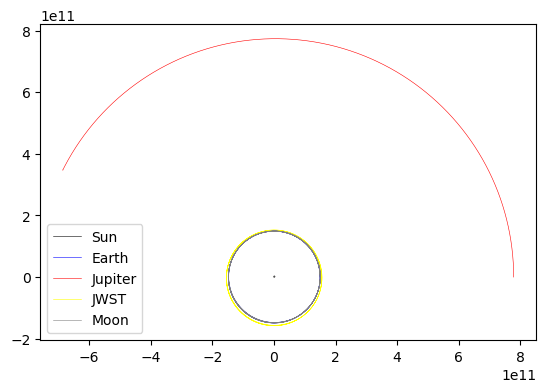

In [11]:
# print(trajectory_list)

i = 0
colors = ['black', 'blue', 'red', 'yellow', 'grey']
# colors = ['black', 'blue', 'yellow', 'grey']
# colors = ['black', 'blue', 'grey']
# colors = ['black', 'blue', 'yellow', 'grey']
# colors = ['black', 'blue', 'grey']
# colors = ['blue', 'black']


trajectory_list = np.asarray(trajectory_list)
for body in body_list:
	curr_x_list = trajectory_list[:, i, 0]
	curr_y_list = trajectory_list[:, i, 1]
	body_values = body.get_values()
	plt.plot(curr_x_list, curr_y_list, color=colors[i], linewidth=0.4, label=body_values[6])
	fig = plt.gcf()
	ax = fig.gca()
	circle = plt.Circle((curr_x_list[-1], curr_y_list[-1]), body.body_radius, color=colors[i])
	ax.add_artist(circle)
	ax.legend()
	# ax.set_ylim(radius_earth-5000, radius_earth+10000)
	# ax.set_xlim(-10000, +10000)
	i = i + 1

ax.set_aspect(1)
plt.show()
plt.close()
